# Linear regression

We will start studying linear models with linear regression. First of all, you must specify a model that relates the dependent variable $y$ to the explanatory factors (or features); for linear models, the dependency function will take the following form:

$$\large y = w_0 + \sum_{i=1}^m w_i x_i,$$

where $m$ is the number of features.

If we add a fictitious dimension $x_0 = 1$ (called _bias_ or _intercept_ term) for each observation, then the linear form can be rewritten in a slightly more compact way by pulling the absolute term $w_0$ into the sum: 

$\large y = \sum_{i=0}^m w_i x_i = \textbf{w}^\text{T} \textbf{x}$.

If we have a matrix of $n$ observations, where the rows are observations from a data set, we need to add a single column of ones on the left. We define the model as follows:

$$\large \textbf y = \textbf X \textbf w + \epsilon,$$

where

- $\textbf w \in \mathbb{R}^{m+1}$ – is a $(m+1) \times 1$ column-vector of the model parameters (in machine learning, these parameters are often referred to as __weights__);
- $\textbf X \in \mathbb{R}^{n \times (m+1)}$ – is a $n \times (m+1)$ matrix of observations and their features, (including the fictitious column on the left) with full column [rank](https://en.wikipedia.org/wiki/Rank_(linear_algebra)):  $\text{rank}\left(\textbf X\right) = m + 1 $;
- $\epsilon \in \mathbb{R}^n$ – is a $n \times 1$ random column-vector, referred to as _error_ or _noise_;
- $\textbf y \in \mathbb{R}^n$ – is a $n \times 1$ column-vector - the dependent (or _target_) variable.

We can also write this expression out for each observation

$$\large y_i = \sum_{j=0}^m w_j X_{ij} + \epsilon_i$$

We can apply the following restrictions to the set of random errors $\epsilon_i$ (see [Gauss-Markov theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) for deeper statistical motivation):

- expectation of all random errors is zero:  $\forall i: \mathbb{E}\left[\epsilon_i\right] = 0 $;
- all random errors have the same finite variance, this property is called [homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity):  $\forall i: \text{Var}\left(\epsilon_i\right) = \sigma^2 < \infty $;
- random errors are uncorrelated:  $\forall i \neq j: \text{Cov}\left(\epsilon_i, \epsilon_j\right) = 0 $.

[Estimator](https://en.wikipedia.org/wiki/Estimator) $\widehat{w}_i $ of weights  $w_i $ is called __linear__ if

$$\large \widehat{w}_i = \omega_{1i}y_1 + \omega_{2i}y_2 + \cdots + \omega_{ni}y_n,$$

where  $\forall\ k\ $, $\omega_{ki} $
depend only on the samples from $\textbf X$, but not on $\textbf w$ - we don't know the true coefficients $w_i$ (that's why we try to estimate them with the given data).

Since the solution for finding the optimal weights is a linear estimator, the model is called __linear regression__.

Let's introduce one more definition. Estimator $\widehat{w}_i $ is called *unbiased* when its expectation is equal to the real but unknown value of the estimated parameter:

$$\Large \mathbb{E}\left[\widehat{w}_i\right] = w_i$$

## Ordinary Least Squares
One of the ways to calculate those weights is with the ordinary least squares method (__OLS__), which minimizes the mean squared error between the actual value of the dependent variable and the predicted value given by the model:

$$\Large \begin{array}{rcl}\mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \textbf{w}^\text{T} \textbf{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \textbf{y} - \textbf X \textbf{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\textbf{y} - \textbf X \textbf{w}\right)^\text{T} \left(\textbf{y} - \textbf X \textbf{w}\right)
\end{array}$$

To solve this optimization problem, we need to calculate derivatives with respect to the model parameters. We set them to zero and solve the resulting equation for $\textbf w$.

A simple matrix derivatives cheatsheet can help:

$$\large \begin{array}{rcl} 
\frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} &=& \textbf{A} \\
\frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} \textbf{X} &=& \left(\textbf{A} + \textbf{A}^{\text{T}}\right)\textbf{X} \\
\frac{\partial}{\partial \textbf{A}} \textbf{X}^{\text{T}} \textbf{A} \textbf{y} &=&  \textbf{X}^{\text{T}} \textbf{y}\\
\frac{\partial}{\partial \textbf{X}} \textbf{A}^{-1} &=& -\textbf{A}^{-1} \frac{\partial \textbf{A}}{\partial \textbf{X}} \textbf{A}^{-1} 
\end{array}$$

What we get is:

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} &=& \frac{\partial}{\partial \textbf{w}} \frac{1}{2n} \left( \textbf{y}^{\text{T}} \textbf{y} -2\textbf{y}^{\text{T}} \textbf{X} \textbf{w} + \textbf{w}^{\text{T}} \textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) \\
&=& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right)
\end{array}$$

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) = 0 \\
&\Leftrightarrow& -\textbf{X}^{\text{T}} \textbf{y} + \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = 0 \\
&\Leftrightarrow& \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = \textbf{X}^{\text{T}} \textbf{y} \\
&\Leftrightarrow& \textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$

Bearing in mind all the definitions and conditions described above, we can say that, based on the [Gauss-Markov theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem), __OLS__ estimators of the model parameters are optimal among all linear and unbiased estimators, i.e. they give the lowest variance.

## Maximum Likelihood Estimation
One could ask why we choose to minimize the mean square error instead of something else? After all, one can minimize the mean absolute value of the residual. The only thing that will happen, if we change the minimized value, is that we will exceed the [Gauss-Markov theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) conditions, and our estimates will therefore cease to be the optimal over the linear and unbiased ones.

Before we continue, let's illustrate maximum likelihood estimation with a simple example.

Let's assume we want to know how many people remember the [Pythagorean theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem). We launch a survey and out of 400 people who responded only 117 people remembered the theorem. Then, it is reasonable to assume that the probability that the next respondent knows the theorem is $\frac{117}{400} \approx 29\%$.

Let's show that this intuitive assessment is not only good but also a [maximum likelihood estimate](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). Where this estimate come from? Recall the definition of the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution): a random variable has a Bernoulli distribution if it takes only two values ($1$ and $0$ with probability $\theta$ and $1 - \theta$, respectively) and has the following probability distribution function:

$$\Large p\left(\theta, x\right) = \theta^x \left(1 - \theta\right)^{\left(1 - x\right)}, x \in \left\{0, 1\right\}$$

This distribution is exactly what we need, and the distribution parameter $\theta$ is the estimate of the probability that a person knows the Pythagorean theorem.

In our $400$ _independent_ experiments, let's denote their outcomes as $\textbf{x} = \left(x_1, x_2, \ldots, x_{400}\right)$. Let's write down the likelihood of our data (observations), i.e. the probability of observing exactly these 117 realizations of the random variable $x = 1$ and 283 realizations of $x = 0$:

$$\Large p(\textbf{x}; \theta) = \prod_{i=1}^{400} \theta^{x_i} \left(1 - \theta\right)^{\left(1 - x_i\right)} = \theta^{117} \left(1 - \theta\right)^{283}$$

Next, we will maximize the expression with respect to $\theta$. Most often this is not done with the likelihood $p(\textbf{x}; \theta)$ but with its logarithm (the monotonic transformation does not change the solution but simplifies calculation greatly):

$$\Large \log p(\textbf{x}; \theta) = \log \prod_{i=1}^{400} \theta^{x_i} \left(1 - \theta\right)^{\left(1 - x_i\right)} = $$
$$ \large = \log \theta^{117} \left(1 - \theta\right)^{283} =  117 \log \theta + 283 \log \left(1 - \theta\right)$$

Now, we want to find such a value of $\theta$ that will maximize the likelihood. For this purpose, we'll take the derivative with respect to $\theta$, set it to zero, and solve the resulting equation:

$$\Large  \frac{\partial \log p(\textbf{x}; \theta)}{\partial \theta} = \frac{\partial}{\partial \theta} \left(117 \log \theta + 283 \log \left(1 - \theta\right)\right) = \frac{117}{\theta} - \frac{283}{1 - \theta};$$

It turns out that our intuitive assessment is exactly the _maximum likelihood estimate_. Now let us apply the same reasoning to the linear regression problem and try to find out what lies beyond the mean squared error. To do this, we'll need to look at linear regression from a probabilistic perspective. Our model naturally remains the same:

$$\Large \textbf y = \textbf X \textbf w + \epsilon,$$

but let us now assume that the random errors follow a centered [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution):

$$\Large \epsilon_i \sim \mathcal{N}\left(0, \sigma^2\right)$$

> Note: It's an additional assumption, it's not a prerequisite of a Gauss-Markov theorem

Let's rewrite the model from a new perspective:

$$\Large \begin{array}{rcl} 
y_i &=& \sum_{j=1}^m w_j X_{ij} + \epsilon_i \\
&\sim& \sum_{j=1}^m w_j X_{ij} + \mathcal{N}\left(0, \sigma^2\right) \\
p\left(y_i \mid \textbf X; \textbf{w}\right) &=& \mathcal{N}\left(\sum_{j=1}^m w_j X_{ij}, \sigma^2\right)
\end{array}$$

Since the examples are taken independently (uncorrelated errors is one of the conditions of the Gauss-Markov theorem), the full likelihood of the data will look like a product of the density functions $p\left(y_i\right)$. Let's consider the log-likelihood, which allows us to switch products to sums:

$$\Large \begin{array}{rcl} 
\log p\left(\textbf{y}\mid \textbf X; \textbf{w}\right) &=& \log \prod_{i=1}^n \mathcal{N}\left(\sum_{j=1}^m w_j X_{ij}, \sigma^2\right) \\
&=& \sum_{i=1}^n \log \mathcal{N}\left(\sum_{j=1}^m w_j X_{ij}, \sigma^2\right) \\
&=& -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^\text{T} \textbf{x}_i\right)^2
\end{array}$$

We want to find the maximum likelihood hypothesis i.e. we need to maximize the expression $p\left(\textbf{y} \mid \textbf X; \textbf{w}\right)$ to get $\textbf{w}_{\text{ML}}$, which is the same as maximizing its logarithm. Note that, while maximizing the function over some parameter, you can throw away all the members that do not depend on this parameter:

$$\Large \begin{array}{rcl} 
\textbf{w}_{\text{ML}} &=& \arg \max_{\textbf w} p\left(\textbf{y}\mid \textbf X; \textbf{w}\right) = \arg \max_{\textbf w} \log p\left(\textbf{y}\mid \textbf X; \textbf{w}\right)\\
&=& \arg \max_{\textbf w} -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=& \arg \max_{\textbf w} -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=&  \arg \min_{\textbf w} \mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right)
\end{array}$$

Thus, we have seen that the maximization of the likelihood of data is the same as the minimization of the mean squared error (given the above assumptions). It turns out that such a cost function is a consequence of the fact that the errors are distributed normally.

## Bias-Variance Decomposition
Let's discuss the error properties of linear regression prediction, which is valid for all machine learning algorithms. We just covered the following:

- true value of the target variable is the sum of a deterministic function $f\left(\textbf{x}\right)$ and random error $\epsilon$: $y = f\left(\textbf{x}\right) + \epsilon$;
- error is normally distributed with zero mean and some variance: $\epsilon \sim \mathcal{N}\left(0, \sigma^2\right)$;
- true value of the target variable is also normally distributed: $y \sim \mathcal{N}\left(f\left(\textbf{x}\right), \sigma^2\right)$;
- we try to approximate a deterministic but unknown function $f\left(\textbf{x}\right)$ using a linear function of the covariates $\widehat{f}\left(\textbf{x}\right)$, which, in turn, is a point estimate of the function $f$ in function space (specifically, the family of linear functions that we have limited our space to), i.e. a random variable that has mean and variance.

So, the error at the point $\textbf{x}$ decomposes as follows:

$$\Large \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\left(\widehat{f}\left(\textbf{x}\right)\right)^2\right] - 2\mathbb{E}\left[y\widehat{f}\left(\textbf{x}\right)\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\widehat{f}^2\right] - 2\mathbb{E}\left[y\widehat{f}\right] \\
\end{array}$$

For clarity, we will omit the notation of the argument of the functions. Let's consider each member separately. The first two are easily decomposed according to the formula $\text{Var}\left(z\right) = \mathbb{E}\left[z^2\right] - \mathbb{E}\left[z\right]^2$:

$$\Large \begin{array}{rcl} 
\mathbb{E}\left[y^2\right] &=& \text{Var}\left(y\right) + \mathbb{E}\left[y\right]^2 = \sigma^2 + f^2\\
\mathbb{E}\left[\widehat{f}^2\right] &=& \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 \\
\end{array}$$

Note that:

$$\Large \begin{array}{rcl} 
\text{Var}\left(y\right) &=& \mathbb{E}\left[\left(y - \mathbb{E}\left[y\right]\right)^2\right] \\
&=& \mathbb{E}\left[\left(y - f\right)^2\right] \\
&=& \mathbb{E}\left[\left(f + \epsilon - f\right)^2\right] \\
&=& \mathbb{E}\left[\epsilon^2\right] = \sigma^2
\end{array}$$

$$\Large \mathbb{E}[y] = \mathbb{E}[f + \epsilon] = \mathbb{E}[f] + \mathbb{E}[\epsilon] = f$$

And finally, we get to the last term in the sum. Recall that the error and the target variable are independent of each other:

$$\Large \begin{array}{rcl} 
\mathbb{E}\left[y\widehat{f}\right] &=& \mathbb{E}\left[\left(f + \epsilon\right)\widehat{f}\right] \\
&=& \mathbb{E}\left[f\widehat{f}\right] + \mathbb{E}\left[\epsilon\widehat{f}\right] \\
&=& f\mathbb{E}\left[\widehat{f}\right] + \mathbb{E}\left[\epsilon\right] \mathbb{E}\left[\widehat{f}\right]  = f\mathbb{E}\left[\widehat{f}\right]
\end{array}$$

Finally, let's bring this all together:

$$\Large \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \sigma^2 + f^2 + \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 - 2f\mathbb{E}\left[\widehat{f}\right] \\
&=& \left(f - \mathbb{E}\left[\widehat{f}\right]\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2 \\
&=& \text{Bias}\left(\widehat{f}\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2
\end{array}$$

With that, we have reached our ultimate goal -- the last formula tells us that the forecast error of any model of type $y = f\left(\textbf{x}\right) + \epsilon$ is composed of:

- squared bias: $\text{Bias}\left(\widehat{f}\right)$ is the average error for all sets of data;
- variance: $\text{Var}\left(\widehat{f}\right)$ is error variability, or by how much error will vary if we train the model on different sets of data;
- irremovable error: $\sigma^2$.

While we cannot do anything with the $\sigma^2$ term, we can influence the first two. Ideally, we'd like to negate both of these terms (upper left square of the picture), but, in practice, it is often necessary to balance between the biased and unstable estimates (high variance).

<img src="images/bias_variance.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

Generally, as the model becomes more computational (e.g. when the number of free parameters grows), the variance (dispersion) of the estimate also increases, but bias decreases. Due to the fact that the training set is memorized completely instead of generalizing, small changes lead to unexpected results (overfitting). On the other side, if the model is too weak, it will not be able to learn the pattern, resulting in learning something different that is offset with respect to the right solution.

<img src="images/bv.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

The Gauss-Markov theorem asserts that the __OLS__ estimator of parameters of the linear model is the best for the class of linear unbiased estimator. This means that if there exists any other unbiased model $g$, from the same class of linear models, we can be sure that $Var\left(\widehat{f}\right) \leq Var\left(g\right)$.

## Regularization of Linear Regression 

There are situations where we might intentionally increase the bias of the model for the sake of stability i.e. to reduce the variance of the model $\text{Var}\left(\widehat{f}\right)$. One of the conditions of the Gauss-Markov theorem is the full column rank of matrix $\textbf{X}$. Otherwise, the __OLS__ solution $\textbf{w} = \left(\textbf{X}^\text{T} \textbf{X}\right)^{-1} \textbf{X}^\text{T} \textbf{y}$ does not exist since the inverse matrix $\left(\textbf{X}^\text{T} \textbf{X}\right)^{-1}$ does not exist.

In other words, matrix $\textbf{X}^\text{T} \textbf{X}$ will be singular or degenerate. This problem is called an [ill-posed problem](https://en.wikipedia.org/wiki/Well-posed_problem). Problems like this must be corrected, namely, matrix $\textbf{X}^\text{T} \textbf{X}$ needs to become non-degenerate, or regular (which is why this process is called regularization).

Often we observe the so-called multicollinearity in the data: when two or more features are strongly correlated, it is manifested in the matrix $\textbf{X}$ in the form of _almost_ linear dependence between the columns. For example, in the problem of predicting house prices by their parameters, attributes `area with balcony` and `area without balcony` will have an _almost_ linear relationship. Formally, matrix $\textbf{X}^\text{T} \textbf{X}$ for such data is reversible, but, due to multicollinearity, some of its eigenvalues will be close to zero. In the inverse matrix $\left(\textbf{X}^\text{T} \textbf{X}\right)^{-1}$, some extremely large eigenvalues will appear, as eigenvalues of the inverse matrix are $\frac{1}{\lambda_i}$. The result of this vacillation of eigenvalues is an unstable estimate of model parameters, i.e. adding a new set of observations to the training data will lead to a completely different solution. 

One method of regularization is [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization), which generally looks like the addition of a new member to the mean squared error:

$$\Large \begin{array}{rcl} 
\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 + \left\| \Gamma \textbf{w}\right\|^2\\
\end{array}$$

The Tikhonov matrix is often expressed as the product of a number by the identity matrix: $\Gamma = \frac{\lambda}{2} E$. In this case, the problem of minimizing the mean squared error becomes a problem with a restriction on the $L_2$ norm. If we differentiate the new cost function with respect to the model parameters, set the resulting function to zero, and rearrange for  $\textbf{w}$, we get the exact solution of the problem.

$$\Large \begin{array}{rcl} 
\textbf{w} &=& \left(\textbf{X}^{\text{T}} \textbf{X} + \lambda \textbf{E}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$

This type of regression is called ridge regression. The ridge is the diagonal matrix that we add to the $\textbf{X}^\text{T} \textbf{X}$ matrix to ensure that we get a regular matrix as a result.

<img src="images/ridge.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

Such a solution reduces dispersion but becomes biased because the norm of the vector of parameters is also minimized, which makes the solution shift towards zero. On the figure below, the _OLS_ solution is at the intersection of the white dotted lines. Blue dots represent different solutions of ridge regression. It can be seen that by increasing the regularization parameter $\lambda$, we shift the solution towards zero.

<img src="images/l2.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

## Linear regression example
The example uses the first feature of the diabetes dataset, in order to illustrate the data points within the two-dimensional plot.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LinearRegression

Load the diabetes dataset and use only one feature.

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

diabetes_X = diabetes_X[:, np.newaxis, 2]

Split the data & target into training/testing sets

In [3]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

Create linear regression object and train the model using the training sets

In [4]:
regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train);

Make predictions using the testing set

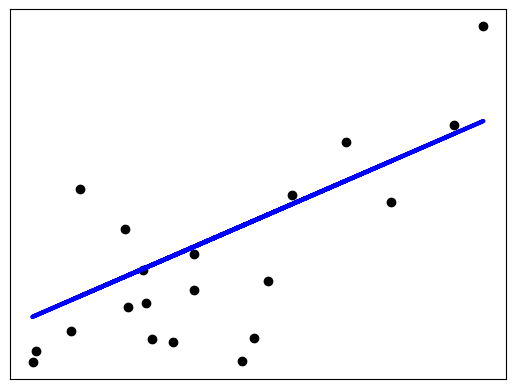

In [5]:
diabetes_y_pred = regr.predict(diabetes_X_test)

plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

The plot is showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

# Linear Classifier
The basic idea behind a linear classifier is that two target classes can be separated by a hyperplane in the feature space. If this can be done without error, the training set is called *linearly separable*.

<img src="images/logit.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

We have already seen linear regression and Ordinary Least Squares (OLS). Let's consider a binary classification problem, and denote target classes to be `+1` (positive examples) and `-1` (negative examples). One of the simplest linear classifiers can be defined using regression as follows:

$$\Large a(\textbf{x}) = \text{sign}(\textbf{w}^\text{T}\textbf x),$$

where
 - $\textbf{x}$ –  is a feature vector (along with identity);
 - $\textbf{w}$ – is a vector of weights in the linear model (with bias $w_0$);
 - $\text{sign}(\bullet)$ – is the signum function that returns the sign of its argument;
 - $a(\textbf{x})$ – is a classifier response for $\textbf{x}$.

##  Logistic Regression as a Linear Classifier
Logistic regression is a special case of the linear classifier, but it has an added benefit of predicting a probability $p_+$ of referring example $\textbf{x}_\text{i}$ to the class `+`:

$$\Large p_+ = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) $$

Being able to predict not just a response (`+1` or `-1`) but the *probability* of assignment to class `+1` is a very important requirement in many business problems e.g. credit scoring where logistic regression is traditionally used. Customers who have applied for a loan are ranked based on this predicted probability (in descending order) to obtain a scoreboard that rates customers from bad to good. Below is an example of such a toy scoreboard.

<img src="images/loan.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

The bank chooses a threshold $p_*$ to predict the probability of loan default (in the picture it's $0.15$) and stops approving loans starting from that value. Moreover, it is possible to multiply this predicted probability by the loan amount to get the expectation of losses from the client, which can also constitute good business metrics (scoring experts may have more to add, but the main gist is this).

To predict the probability $p_+ \in [0,1]$, we can start by constructing a linear prediction using __OLS__: $b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}$. But converting the resulting value to the probability within in the [0, 1] range requires some function $f: \mathbb{R} \rightarrow [0,1]$. Logistic regression uses a specific function for this: $\sigma(z) = \frac{1}{1 + \exp^{-z}}$.

<img src="images/sigmoid.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

Now let's understand what the prerequisites are. Let's denote the probability of an event $X$ as $P(X)$. Then the odds ratio $OR(X)$ is determined by $\frac{P(X)}{1-P(X)}$, which is the ratio of the probabilities of whether or not an event will happen. It is obvious that the probability and odds ratio contain the same information, but, while $P(X)$ ranges from 0 to 1, $OR(X)$ is in the range of 0 to $\infty$.

If we calculate the logarithm of $OR(X)$ (a logarithm of odds or log probability ratio), it is easy to notice that $\log{OR(X)} \in \mathbb{R}$. This is what we will use with __OLS__.

Let's see how logistic regression will make a prediction $p_+ = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right)$.

> Note: For now, let's assume that we have somehow obtained weights $\textbf{w}$ (trained the model).

* __Step 1__: Calculate $w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \textbf{w}^\text{T}\textbf{x}$. (Equation $\textbf{w}^\text{T}\textbf{x} = 0$ defines a hyperplane separating the examples into two classes);

* __Step 2__: Compute the log odds ratio: $ \log(OR_{+}) = \textbf{w}^\text{T}\textbf{x}$.

* __Step 3__: Now that we have the chance of assigning an example to the class of `+` - $OR_{+}$, calculate $p_{+}$ using the simple relationship:

$$\large p_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\textbf{w}^\text{T}\textbf{x}}}{1 + \exp^{\textbf{w}^\text{T}\textbf{x}}} = \frac{1}{1 + \exp^{-\textbf{w}^\text{T}\textbf{x}}} = \sigma(\textbf{w}^\text{T}\textbf{x})$$

On the right side, you can see that we have the sigmoid function.

So, logistic regression predicts the probability of assigning an example to the `+` class (assuming that we know the features and weights of the model) as a sigmoid transformation of a linear combination of the weight vector and the feature vector:

$$\large p_+(\textbf{x}_\text{i}) = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}). $$

Let's see how the model is trained. We will again rely on maximum likelihood estimation.

## Maximum Likelihood Estimation and Logistic Regression
Now let's see how an optimization problem for logistic regression is obtained from the MLE, namely, minimization of the __logistic__ loss function. We have just seen that logistic regression models the probability of assigning an example to the class `+` as:

$$\Large p_+(\textbf{x}_\text{i}) = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^T\textbf{x}_\text{i})$$

Then, for the class `-`, the corresponding expression is as follows:

$$\Large p_-(\textbf{x}_\text{i})  = P\left(y_i = -1 \mid \textbf{x}_\text{i}, \textbf{w}\right)  = 1 - \sigma(\textbf{w}^T\textbf{x}_\text{i}) = \sigma(-\textbf{w}^T\textbf{x}_\text{i}) $$

Both of these expressions can be cleverly combined into one:

$$\Large P\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(y_i\textbf{w}^T\textbf{x}_\text{i})$$

The expression $M(\textbf{x}_\text{i}) = y_i\textbf{w}^T\textbf{x}_\text{i}$ is known as the margin of classification on the object $\textbf{x}_\text{i}$ (not to be confused with a gap, which is also called margin, in the SVM context). If it is non-negative, the model is correct in choosing the class of the object $\textbf{x}_\text{i}$; if it is negative, then the object $\textbf{x}_\text{i}$ is misclassified. Note that the margin is defined for objects in the training set only where real target class labels $y_i$ are known.

To understand exactly why we have come to such a conclusion, let us turn to the geometrical interpretation of the linear classifier.

First, let's look at a classic, introductory problem in linear algebra: find the distance from the point with a radius-vector $\textbf{x}_A$ to a plane defined by the equation $\textbf{w}^\text{T}\textbf{x} = 0.$

<img src="images/linal.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

Answer:

$$\rho(\textbf{x}_A, \textbf{w}^\text{T}\textbf{x} = 0) = \frac{\textbf{w}^\text{T}\textbf{x}_A}{||\textbf{w}||}$$

When we get to the answer, we will understand that the greater the absolute value of the expression $\textbf{w}^\text{T}\textbf{x}_\text{i}$, the farther the point $\textbf{x}_\text{i}$ is from the plane $\textbf{w}^\text{T}\textbf{x} = 0.$

Hence, our expression $M(\textbf{x}_\text{i}) = y_i\textbf{w}^\text{T}\textbf{x}_\text{i}$ is a kind of _confidence_ in our model's classification of the object $\textbf{x}_\text{i}$:

- if the margin is large (in absolute value) and positive, the class label is set correctly, and the object is far away from the separating hyperplane i.e. classified confidently (Point $x_3$ on the picture).
- if the margin is large (in absolute value) and negative, then class label is set incorrectly, and the object is far from the separating hyperplane (the object is most likely an anomaly; for example, it could be improperly labeled in the training set) (Point $x_1$ on the picture).
- if the margin is small (in absolute value), then the object is close to the separating hyperplane, and the margin sign determines whether the object is correctly classified (Points $x_2$ and $x_4$ on the picture).

<img src="images/margin.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

Let's now compute the likelihood of the data set i.e. the probability of observing the given vector $\textbf{y}$ from data set $X$. We'll make a strong assumption: objects come independently from one distribution (__i.i.d.__). Then, we can write

$$\Large P\left(\textbf{y} \mid \textbf{X}, \textbf{w}\right) = \prod_{i=1}^{\ell} P\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right),$$

where $\ell$ is the length of data set $\textbf{X}$ (number of rows).

As usual, let's take the logarithm of this expression because a sum is much easier to optimize than the product:

$$\Large \log P\left(\textbf{y} \mid \textbf{X}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} P\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i})   = $$

$$\Large  = \sum_{i=1}^{\ell} \log \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i}) = \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}}} = - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}})$$

Maximizing the likelihood is equivalent to minimizing the expression:

$$\Large \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}}).$$

This is _logistic_ loss function that is summed over all objects in the training set.

Let's look at the new function as a function of margin $L(M) = \log (1 + \exp^{-M})$ and plot it along with _zero-one loss_ graph, which simply penalizes the model for error on each object by 1 (negative margin): $L_{1/0}(M) = [M < 0]$.

<img src="images/logloss.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

The picture reflects the idea that, if we are not able to directly minimize the number of errors in the classification problem (at least not by gradient methods - derivative of the zero-one loss function at zero turns to infinity), we can minimize its upper bounds. For the logistic loss function (where the logarithm is binary, but this does not matter), the following is valid:

$$\Large \mathcal{L_{1/0}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} [M(\textbf{x}_\text{i}) < 0] \leq \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}), $$

where $\mathcal{L_{1/0}} (\textbf X, \textbf{y})$ is simply the number of errors of logistic regression with weights $\textbf{w}$ on a data set $(\textbf X, \textbf{y})$.

Thus, by reducing the upper bound of $\mathcal{L_{log}}$ by the number of classification errors, we hope to reduce the number of errors itself.

## $L_2$-Regularization of Logistic Loss
$L_2$-regularization of logistic regression is almost the same as in the case of ridge regression. Instead of minimizing the function $\mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w})$ we minimize the following:

$$\Large \mathcal{J}(\textbf X, \textbf{y}, \textbf{w}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) + \lambda |\textbf{w}|^2$$

In the case of logistic regression, a reverse regularization coefficient $C = \frac{1}{\lambda}$ is typically introduced. Then the solution to the problem would be:

$$\Large \widehat{\textbf w}  = \arg \min_{\textbf{w}} \mathcal{J}(\textbf X, \textbf{y}, \textbf{w}) =  \arg \min_{\textbf{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}})+ |\textbf{w}|^2)$$ 

Next, we'll look at an example that allows us to intuitively understand one of the interpretations of regularization.

## Logistic Regression Regularization
Let's see how regularization affects the quality of classification on a biclass dataset. We will use logistic regression with polynomial features and vary the regularization parameter $C$. First, we will see how regularization affects the separating border of the classifier and intuitively recognize under- and overfitting. Then, we will choose the regularization parameter to be numerically close to the optimal value via (`cross-validation`) and (`GridSearch`).

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In this dataset there are two numerical variables and class. Variables are already centered, meaning that the column values have had their own mean values subtracted.

In [3]:
# loading data
data = pd.read_csv(
    "./data/biclass.csv", header=None, names=("feature1", "feature2", "class")
)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  118 non-null    float64
 1   feature2  118 non-null    float64
 2   class     118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


Now we should save the training set and the target class labels in separate NumPy arrays.

In [4]:
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

As an intermediate step, we can plot the data. Orange points correspond to defective chips, blue to normal ones.

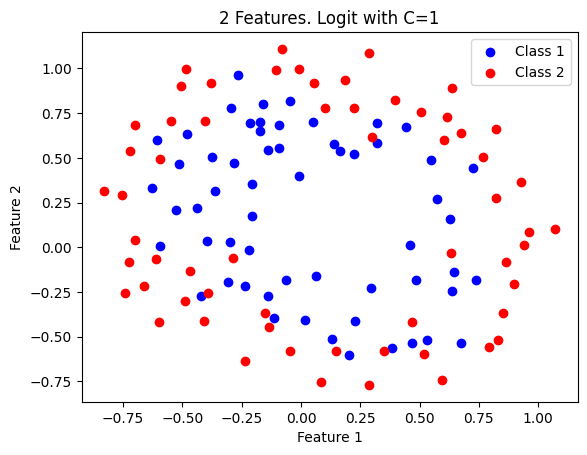

In [5]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label="Class 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2 Features. Logit with C=1")
plt.legend();

Let's define a function to display the separating curve of the classifier.

In [6]:
def plot_boundary(clf, X, y, grid_step=0.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step)
    )

    # to every point from [x_min, m_max]x[y_min, y_max]
    # we put in correspondence its own color
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

We define the following polynomial features of degree $d$ for two variables $x_1$ and $x_2$:

$$\large \{x_1^d, x_1^{d-1}x_2, \ldots x_2^d\} =  \{x_1^ix_2^j\}_{i+j=d, i,j \in \mathbb{N}}$$

For example, for $d=3$, this will be the following features:

$$\large 1, x_1, x_2,  x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3$$

Drawing a Pythagorean Triangle would show how many of these features there will be for $d=4,5...$ and so on.
The number of such features is exponentially large, and it can be costly to build polynomial features of large degree (e.g $d=10$) for 100+ variables. More importantly, it's not needed.

We will use `sklearn`'s implementation of logistic regression. So, we create an object that will add polynomial features up to degree 7 to matrix $X$.

In [7]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
X_poly.shape

(118, 36)

Let's train logistic regression with regularization parameter $C = 10^{-2}$.

Accuracy on training set: 0.627


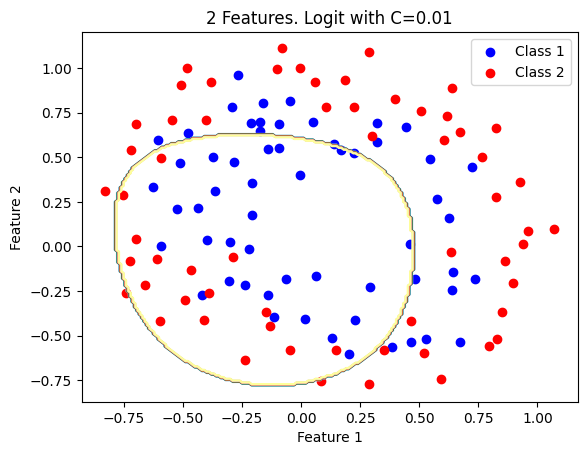

In [8]:
C = 1e-2
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label="Class 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2 Features. Logit with C=%s" % C)
plt.legend()

print("Accuracy on training set:", round(logit.score(X_poly, y), 3))

We could now try increasing $C$ to 1. In doing this, we weaken regularization, and the solution can now have greater values (in absolute value) of model weights than previously. Now the accuracy of the classifier on the training set improves to 0.831.

Accuracy on training set: 0.831


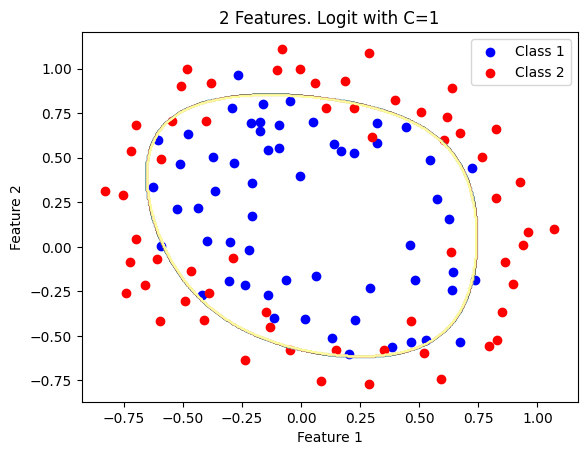

In [9]:
C = 1
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label="Class 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2 Features. Logit with C=%s" % C)
plt.legend()

print("Accuracy on training set:", round(logit.score(X_poly, y), 3))

Then, why don't we increase $C$ even more - up to 10,000? Now, regularization is clearly not strong enough, and we see overfitting. Note that, with $C$=1 and a _smooth_ boundary, the share of correct answers on the training set is not much lower than here. But one can easily imagine how our second model will work much better on new data.

/Users/dima/Development/PyCharmProjects/PythonRetrain/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on training set: 0.873


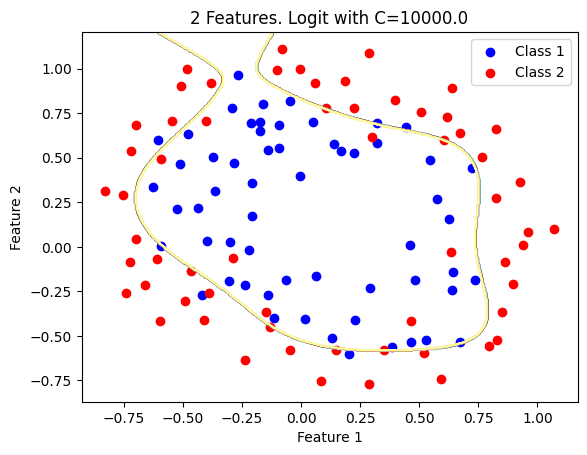

In [10]:
C = 1e4
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label="Class 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2 Features. Logit with C=%s" % C)
plt.legend()

print("Accuracy on training set:", round(logit.score(X_poly, y), 3))

Let's rewrite the function that is optimized in logistic regression with the form:

$$\large J(X,y,w) = \mathcal{L} + \frac{1}{C}||w||^2,$$

where

- $\mathcal{L}$ is the logistic loss function summed over the entire dataset
- $C$ is the reverse regularization coefficient (the very same $C$ from `sklearn`'s implementation of `LogisticRegression`)

__Summary__:
- the larger the parameter $C$, the more complex the relationships in the data that the model can recover (intuitively $C$ corresponds to the _complexity_ of the model - model capacity)
- if regularization is too strong i.e. the values of $C$ are small, the solution to the problem of minimizing the logistic loss function may be the one where many of the weights are too small or zeroed. The model is also not sufficiently _penalized_ for errors (i.e. in the function $J$, the sum of the squares of the weights _outweighs_, and the error $\mathcal{L}$ can be relatively large). In this case, the model will underfit as we saw in our first case.
- on the contrary, if regularization is too weak i.e. the values of $C$ are large, a vector $w$ with high absolute value components can become the solution to the optimization problem. In this case, $\mathcal{L}$ has a greater contribution to the optimized functional $J$. Meaning the model is too _afraid_ to be mistaken on the objects from the training set and will therefore overfit as we saw in the third case.
- logistic regression will not _understand_ (or _learn_) what value of $C$ to choose as it does with the weights $w$. That is to say, it can not be determined by solving the optimization problem in logistic regression.

We have seen a similar situation before -- a decision tree can not _learn_ what depth limit to choose during the training process. Therefore, $C$ is the a model hyperparameter that is tuned on cross-validation; so is the max_depth in a tree.

## Regularization parameter tuning
Using this example, let's identify the optimal value of the regularization parameter $C$. This can be done using `LogisticRegressionCV` - a grid search of parameters followed by cross-validation. This class is designed specifically for logistic regression (effective algorithms with well-known search parameters). For an arbitrary model, use `GridSearchCV`, `RandomizedSearchCV`, or special algorithms for hyperparameter optimization such as the one implemented in `hyperopt`.

In [11]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=0, n_jobs=-1)
logit_searcher.fit(X_poly, y);

logit_searcher.C_

array([150.78450459])

To see how the quality of the model (percentage of correct responses on the training and validation sets) varies with the hyperparameter $C$, we can plot the graph. 

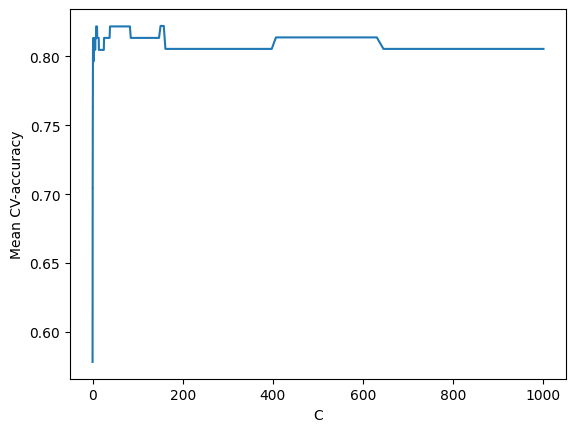

In [16]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel("C")
plt.ylabel("Mean CV-accuracy");

Finally, select the area with the "best" values of $C$.

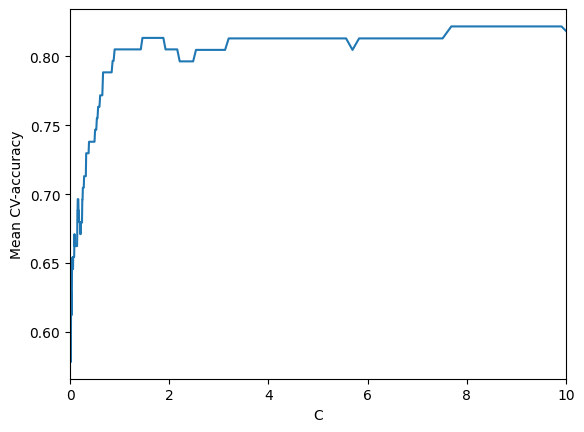

In [17]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel("C")
plt.ylabel("Mean CV-accuracy")
plt.xlim((0, 10));

Recall that these curves are called validation curves. Previously, we built them manually, but sklearn has special methods to construct these that we will use going forward.

## XOR-Problem
Let's now consider an example where linear models are worse.

Linear classification methods still define a very simple separating surface - a hyperplane. The most famous example of where classes cannot be divided by a hyperplane (or line) with no errors is _the XOR problem_.

XOR is the _exclusive OR_, a Boolean function with the following truth table:

<img src="images/xor.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

XOR is the name given to a simple binary classification problem in which the classes are presented as diagonally extended intersecting point clouds.

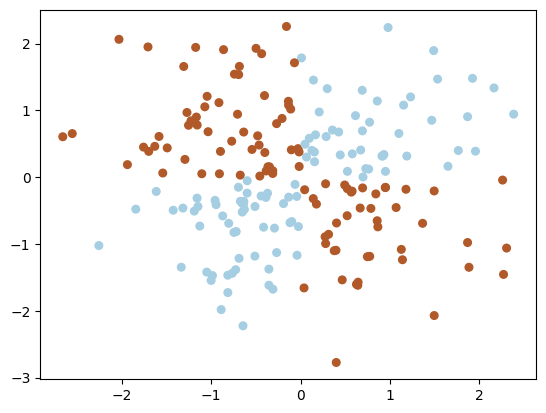

In [12]:
# creating dataset
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);

Obviously, one cannot draw a single straight line to separate one class from another without errors. Therefore, logistic regression performs poorly with this task.

In [13]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

/var/folders/f4/1lqq78l96fl0g_767m0lyysw0000gn/T/ipykernel_10617/3069517639.py:16: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")


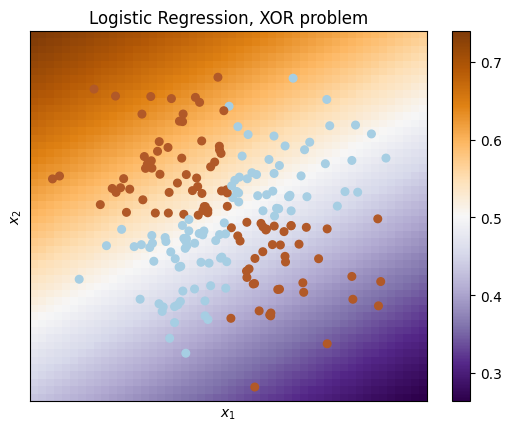

In [14]:
plot_boundary(
    LogisticRegression(solver="lbfgs"), X, y, "Logistic Regression, XOR problem"
)

But if one were to give polynomial features as an input (here, up to 2 degrees), then the problem is solved.

/var/folders/f4/1lqq78l96fl0g_767m0lyysw0000gn/T/ipykernel_10617/3069517639.py:16: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")


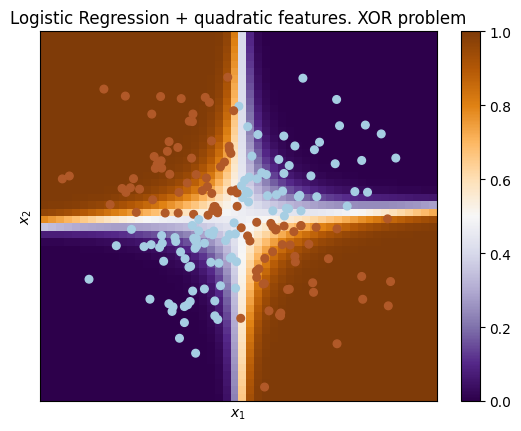

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

logit_pipe = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2)),
        ("logit", LogisticRegression(solver="lbfgs")),
    ]
)

plot_boundary(logit_pipe, X, y, "Logistic Regression + quadratic features. XOR problem")

Here, logistic regression has still produced a hyperplane but in a 6-dimensional feature space $1, x_1, x_2, x_1^2, x_1x_2$ and $x_2^2$. When we project to the original feature space, $x_1, x_2$, the boundary is nonlinear.

In practice, polynomial features do help, but it is computationally inefficient to build them explicitly. Support Vector Machine with the kernel trick works much faster. In this approach, only the distance between the objects (defined by the kernel function) in a high dimensional space is computed, and there is no need to produce a combinatorially large number of features. 

# Validation and Learning Curves
Now that we have an idea of model validation, cross-validation, and regularization. Let's consider the bigger question: _What to do if the quality of the model is dissatisfying?_

- Should we make the model more complicated or more simple?
- Should we add more features?
- Do we simply need more data for training?

The answers to these questions are not obvious. In particular, sometimes a more complex model can lead to a deterioration in performance. Other times, adding new observations will not bring noticeable changes. In fact, the ability to make the right decision and choose the right method to improve the model distinguishes a good professional from a bad one.

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import datasets

We will work our data on Sklearn's breast cancer dataset.

In [17]:
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

Next, we will train logistic regression with stochastic gradient descent. We will review it later.

In [18]:
alphas = np.logspace(-2, 0, 20)
sgd_logit = SGDClassifier(loss="log_loss", n_jobs=-1, random_state=21, max_iter=500)
logit_pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("sgd_logit", sgd_logit),
    ]
)
val_train, val_test = validation_curve(
    logit_pipe, X, y, param_name="sgd_logit__alpha", param_range=alphas, cv=5, scoring="roc_auc",
)

As a first step, we will construct validation curves showing how the quality (ROC-AUC) on training and test sets varies with the regularization parameter.

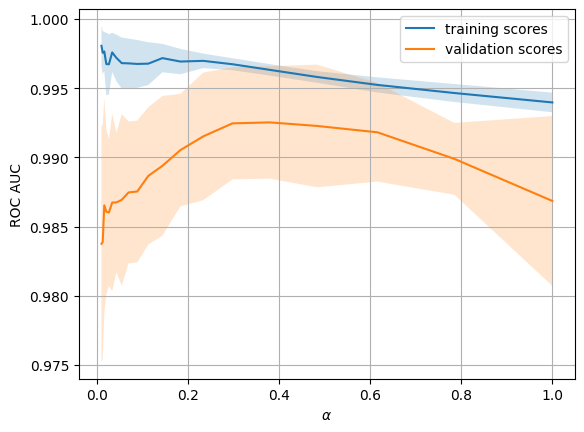

In [19]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )


plot_with_err(alphas, val_train, label="training scores")
plot_with_err(alphas, val_test, label="validation scores")
plt.xlabel(r"$\alpha$")
plt.ylabel("ROC AUC")
plt.legend()
plt.grid(True);

The trend is quite visible and is very common.

- For simple models, training and validation errors are close and large. This suggests that the model **underfitted**, meaning it does not have a sufficient number of parameters.

- For highly sophisticated models, training and validation errors differ significantly. This can be explained by **overfitting**. When there are too many parameters or regularization is not strict enough, the algorithm can be "distracted" by the noise in the data and lose track of the overall trend.

## How much data is needed?

The more data the model uses, the better. But how do we understand whether new data will helpful in any given situation? For example, is it rational to spend $N$ for assessors to double the dataset?

Since the new data can be unavailable, it is reasonable to vary the size of the training set and see how the quality of the solution depends on the amount of training data. This is how we get **learning curves**.

The idea is simple: we display the error as a function of the number of examples used in training. The parameters of the model are fixed in advance.

In [20]:
def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=degree)),
            (
                "sgd_logit",
                SGDClassifier(n_jobs=-1, random_state=21, alpha=alpha, max_iter=500),
            ),
        ]
    )
    N_train, val_train, val_test = learning_curve(
        logit_pipe, X, y, train_sizes=train_sizes, cv=5, scoring="roc_auc"
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()
    plt.grid(True);

Let's see what we get for the linear model. We will set the regularization coefficient to be quite large.

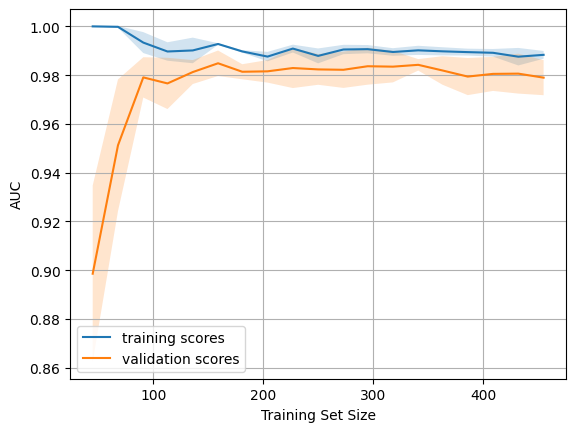

In [21]:
plot_learning_curve(degree=2, alpha=10)

A typical situation: for a small amounts of data, errors between training and cross-validation sets are quite different, indicating overfitting. For that same model but with a large amount of data, errors _converge_, indicating underfitting.

If we add more data, error on the training set will not grow. On the other hand, the error on the test data will not be reduced.

So, we see that the errors _converged_, and the addition of new data will not help. Actually this case is the most interesting for business. It is possible that we increase the size of the dataset by 10x, but, without changing the complexity of the model, this additional data may not help. Therefore the strategy of "set once, then use 10 times" might not work.

What happens if we reduce the regularization coefficient to 0.05?

We see a good trend - the curves gradually converge, and if we move farther to the right i.e. add more data to the model, we can improve the quality on the validation set even more. 

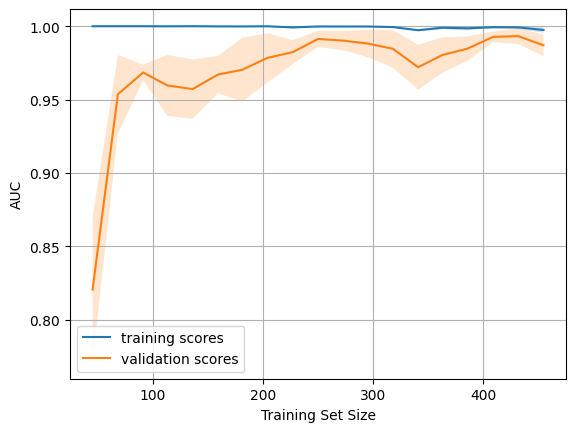

In [28]:
plot_learning_curve(degree=2, alpha=0.05)

Now, what if we make the model even more complex by setting alpha = 10-4?

Overfitting is seen - AUC decreases on both the training and the validation sets.

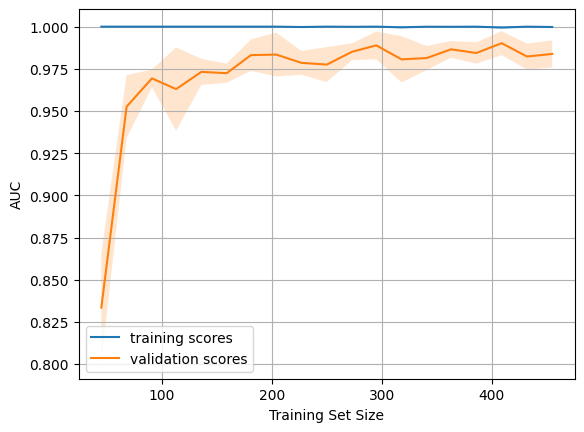

In [29]:
plot_learning_curve(degree=2, alpha=1e-4)

Conclusions on the learning and validation curves:

- Error on the training set says nothing about the quality of the model by itself
- Cross-validation error shows how well the model fits the data (the existing trend in the data) while retaining the ability to generalize to new data
- __Validation curve__ is a graph showing the results on training and validation sets depending on the __complexity of the model__:
    + if the two curves are close to each other and both errors are large, it is a sign of _underfitting_
    + if the two curves are far from each other, it is a sign of _overfitting_
- __Learning Curve__ is a graph showing the results on training and validation sets depending on the number of observations:
    + if the curves converge, adding new data won't help, and it is necessary to change the complexity of the model 
    + if the curves have not converged, adding new data can improve the result

# Lasso and Ridge Regressions

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'
import seaborn as sns

sns.set_theme()  # just to use the seaborn theme


from sklearn import datasets
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_score

We will work with California house prices data.

In [23]:
cali = datasets.fetch_california_housing()
X, y = cali["data"], cali["target"]

Let's read description of data:

In [24]:
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [25]:
cali.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## Lasso Regression
Lasso regression minimizes mean squared error with L1 regularization:
$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$$

where $y = w^Tx$ hyperplane equation depending on model parameters $w$, $\ell$ is number of observations in data $X$, $d$ is number of features, $y$ target values, $\alpha$ regularization coefficient.

Let's fit Lasso Regression with the small $\alpha$ coefficient (weak regularization). Coefficients related to AveRooms & AveBedrms will be zero. It means that these feature are the least important for median house prices prediction in this dataset.

In [26]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso.coef_

array([ 3.90582557e-01,  1.50821512e-02, -0.00000000e+00,  0.00000000e+00,
        1.75019561e-05, -3.32253135e-03, -1.14214430e-01, -9.92250689e-02])

Let's train Lasso Regression with $\alpha=10$. All of the coefficients are equal to zero except Population feature.

In [27]:
lasso = Lasso(alpha=10)
lasso.fit(X, y)
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.73196994e-05, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

It means that Lasso Regression may serve as a feature selection method.

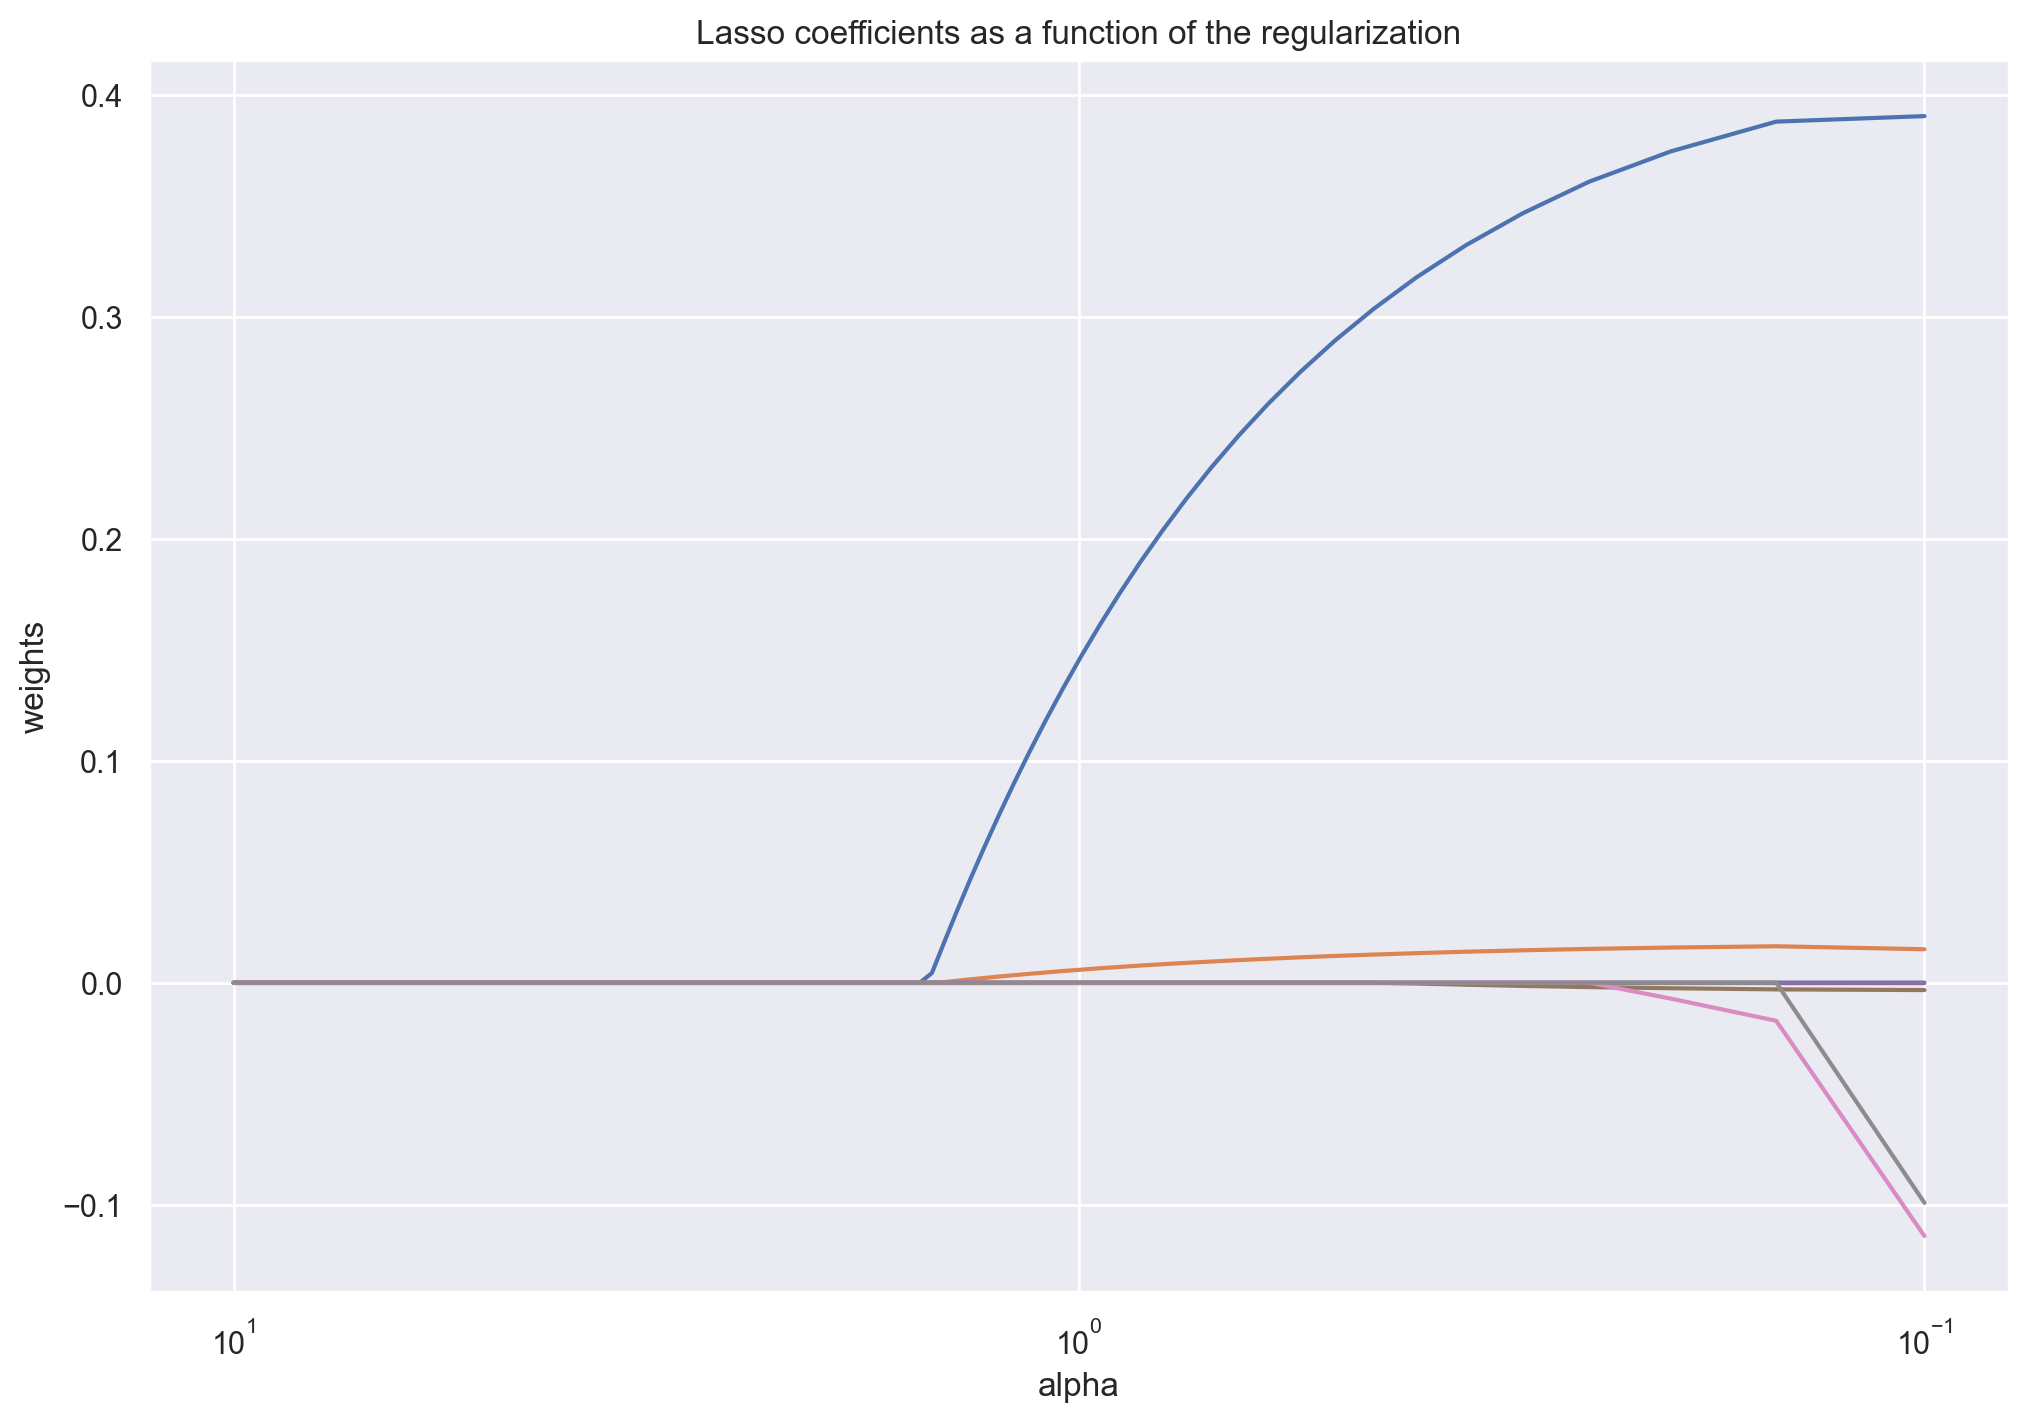

In [28]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

plt.rcParams["figure.figsize"] = (12, 8)

ax = plt.gca()
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show();

Now let's find the best value of $\alpha$ during cross-validation.

In [29]:
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=21)
lasso_cv.fit(X, y)
lasso_cv.coef_

array([ 3.90582557e-01,  1.50821512e-02, -0.00000000e+00,  0.00000000e+00,
        1.75019561e-05, -3.32253135e-03, -1.14214430e-01, -9.92250689e-02])

In [30]:
lasso_cv.alpha_

0.1

In Scikit-learn, metrics are typically _maximized_, so for MSE there's a workaround: `neg_mean_squared_error` is minimized instead. Not really convenient.

In [39]:
cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=3, scoring="neg_mean_squared_error")

array([-0.64089532, -0.55316003, -0.79826342])

In [40]:
abs(
    cross_val_score(
        Lasso(lasso_cv.alpha_), X, y, cv=3, scoring="neg_mean_squared_error"
    ).mean()
)

0.6641062550311727

In [41]:
abs(np.mean(cross_val_score(Lasso(9.95), X, y, cv=3, scoring="neg_mean_squared_error")))

1.3449906190202157

One more ambiguous point: LassoCV sorts values of the parameters in decreasing order to ease optimization. It may seem that $\alpha$ optimization works incorrectly.

In [42]:
lasso_cv.alphas[:10]

array([0.1       , 0.14974874, 0.19949749, 0.24924623, 0.29899497,
       0.34874372, 0.39849246, 0.44824121, 0.49798995, 0.54773869])

In [43]:
lasso_cv.alphas_[:10]

array([10.        ,  9.95025126,  9.90050251,  9.85075377,  9.80100503,
        9.75125628,  9.70150754,  9.65175879,  9.60201005,  9.55226131])

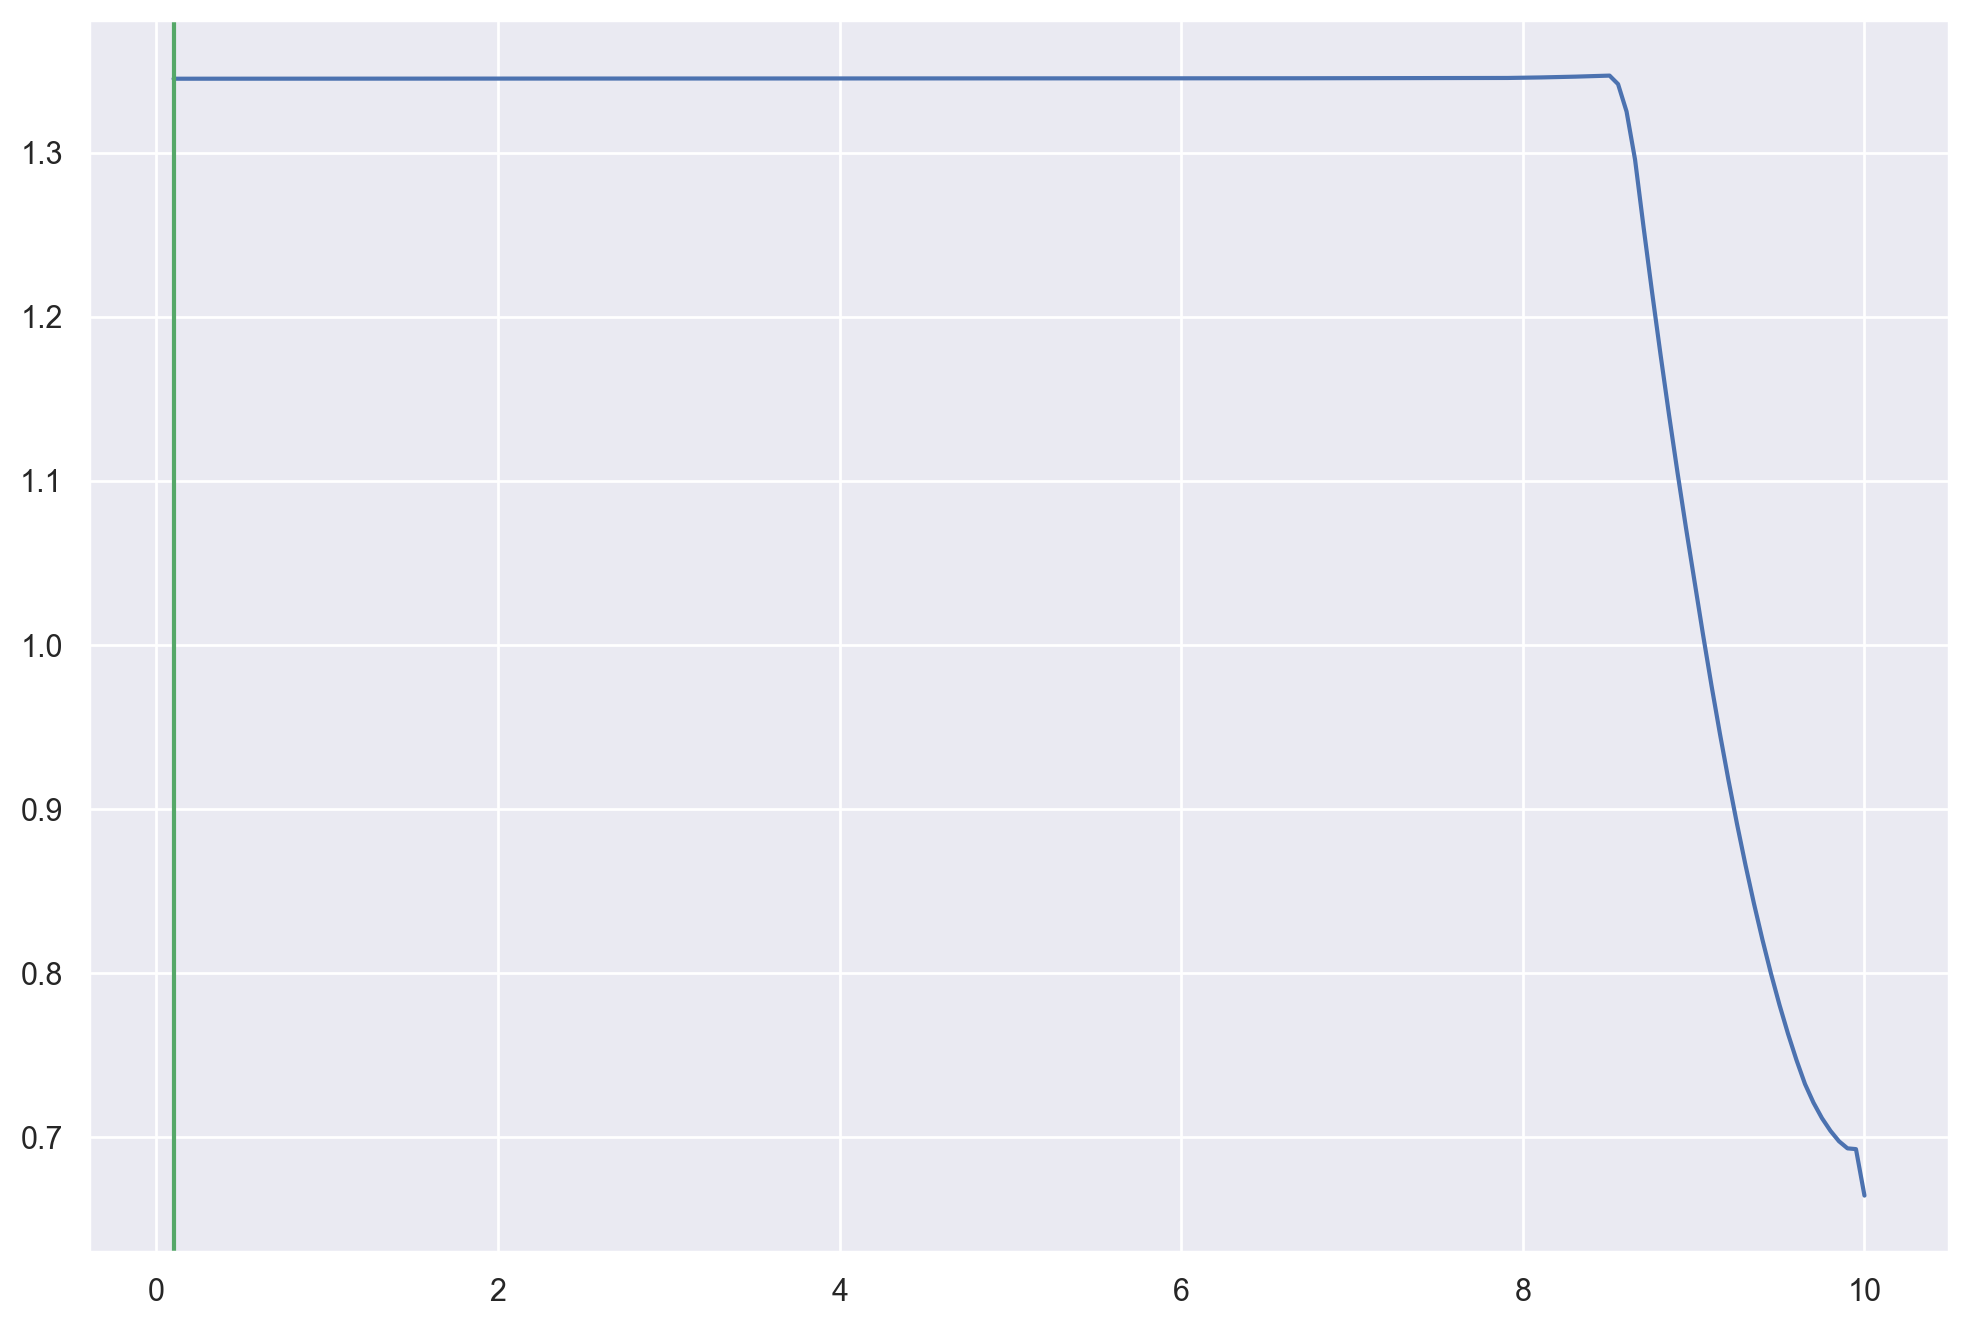

In [44]:
plt.plot(lasso_cv.alphas, lasso_cv.mse_path_.mean(1))  # incorrect
plt.axvline(lasso_cv.alpha_, c="g");

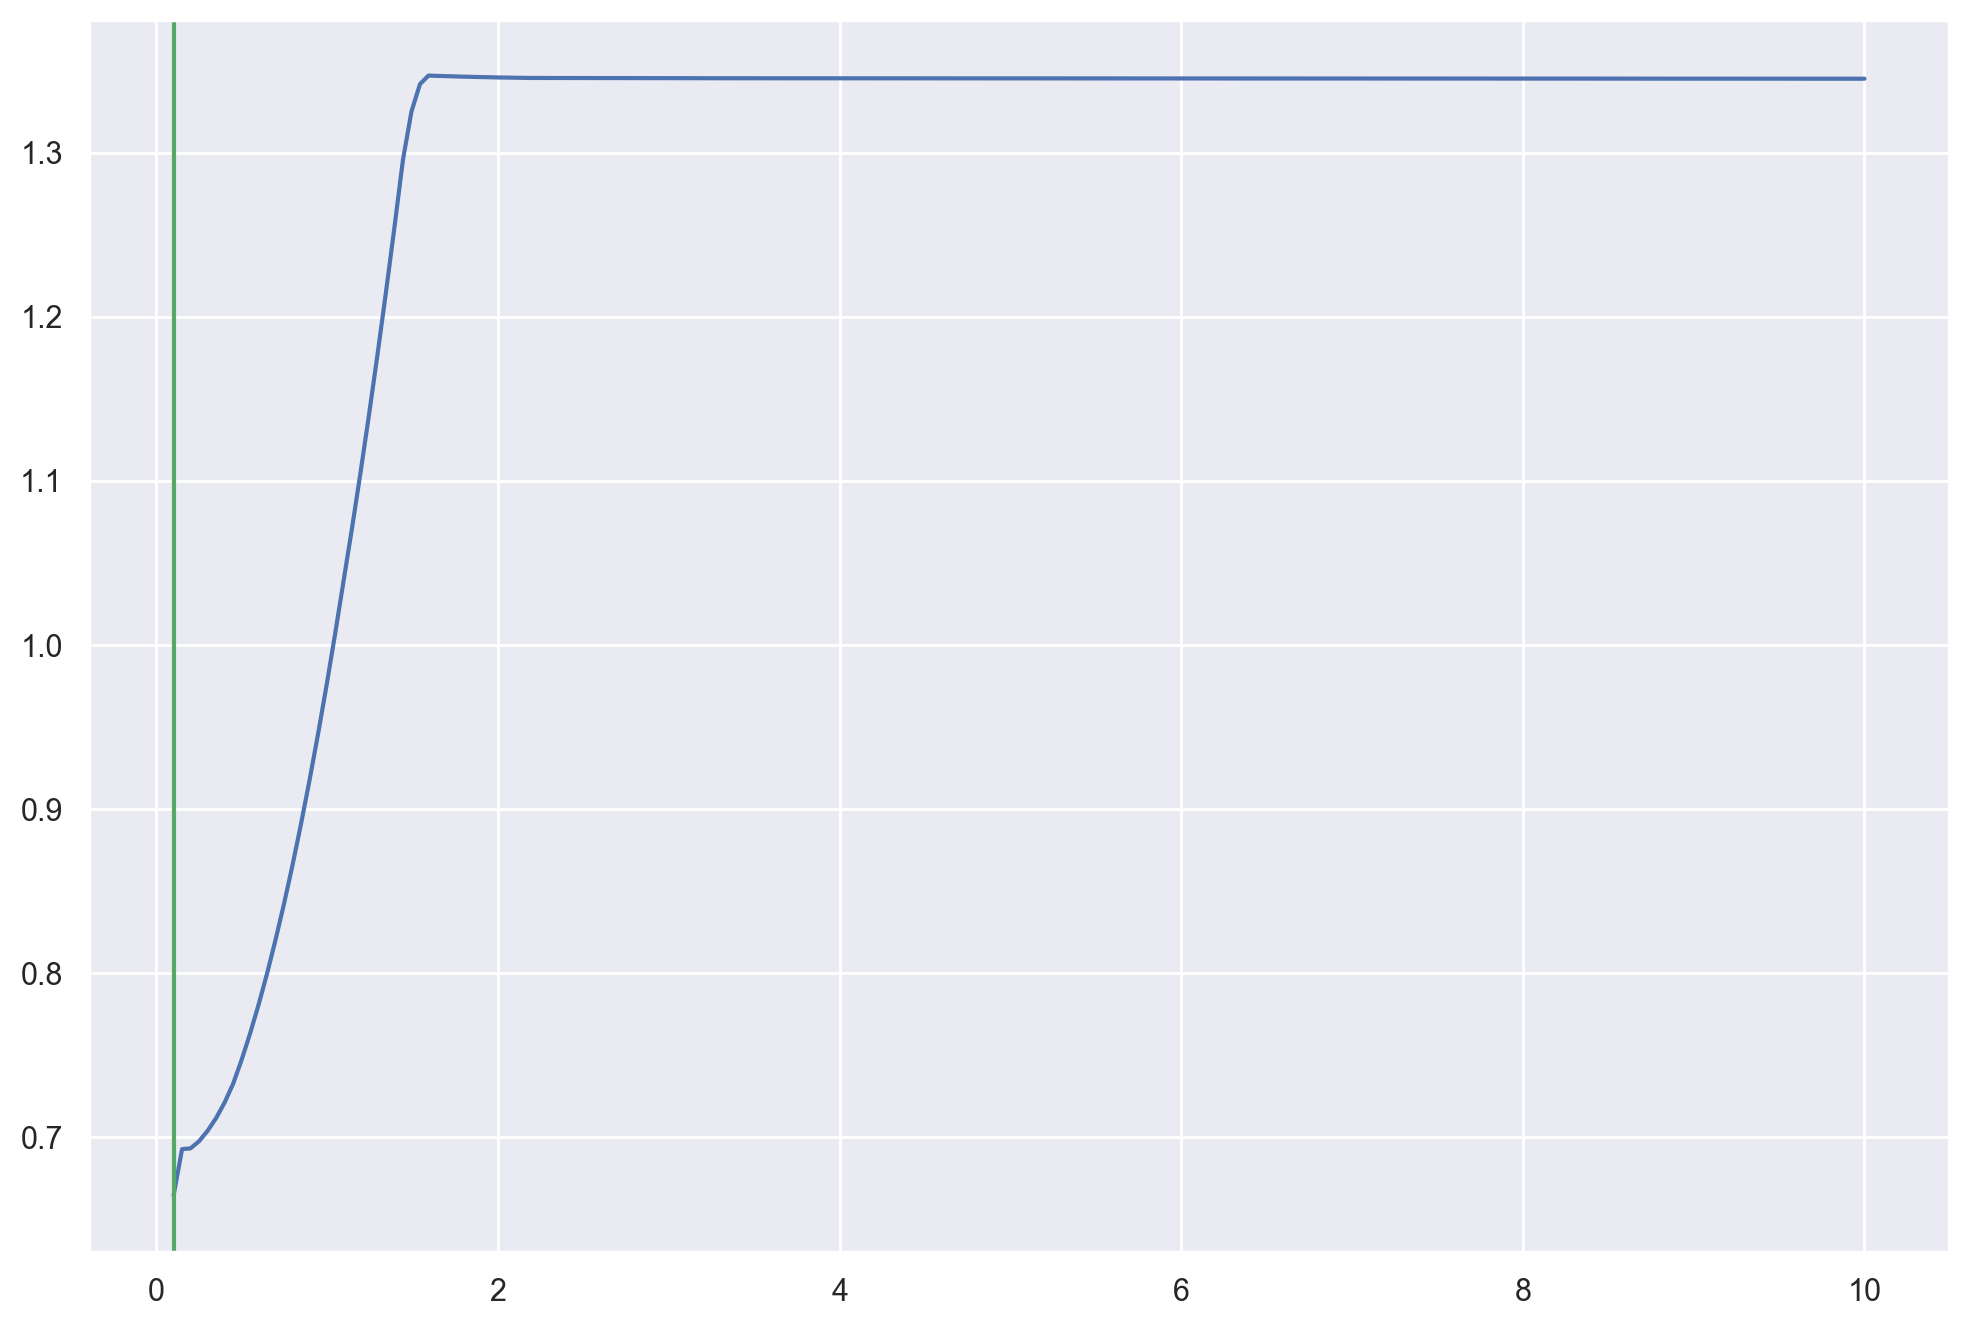

In [45]:
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(1))  # correct
plt.axvline(lasso_cv.alpha_, c="g");

## Ridge Regression
Ridge regression minimizes mean squared error with L2 regularization:
$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d w_i^2$$

where $y = w^Tx$ hyperplane equation depending on model parameters $w$, $\ell$ is number of observations in data $X$, $d$ is number of features, $y$ target values, $\alpha$ regularization coefficient.

There is a special class [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) for Ridge regression cross-validation.

In [31]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

In [32]:
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=3)
ridge_cv.fit(X, y)
ridge_cv.alpha_

0.01

In case of Ridge Regression neither of the parameters are reduced to zero. It can be small value but non-zero.

In [33]:
ridge_cv.coef_

array([ 4.36692302e-01,  9.43579421e-03, -1.07320146e-01,  6.45055646e-01,
       -3.97632893e-06, -3.78654081e-03, -4.21314228e-01, -4.34513465e-01])

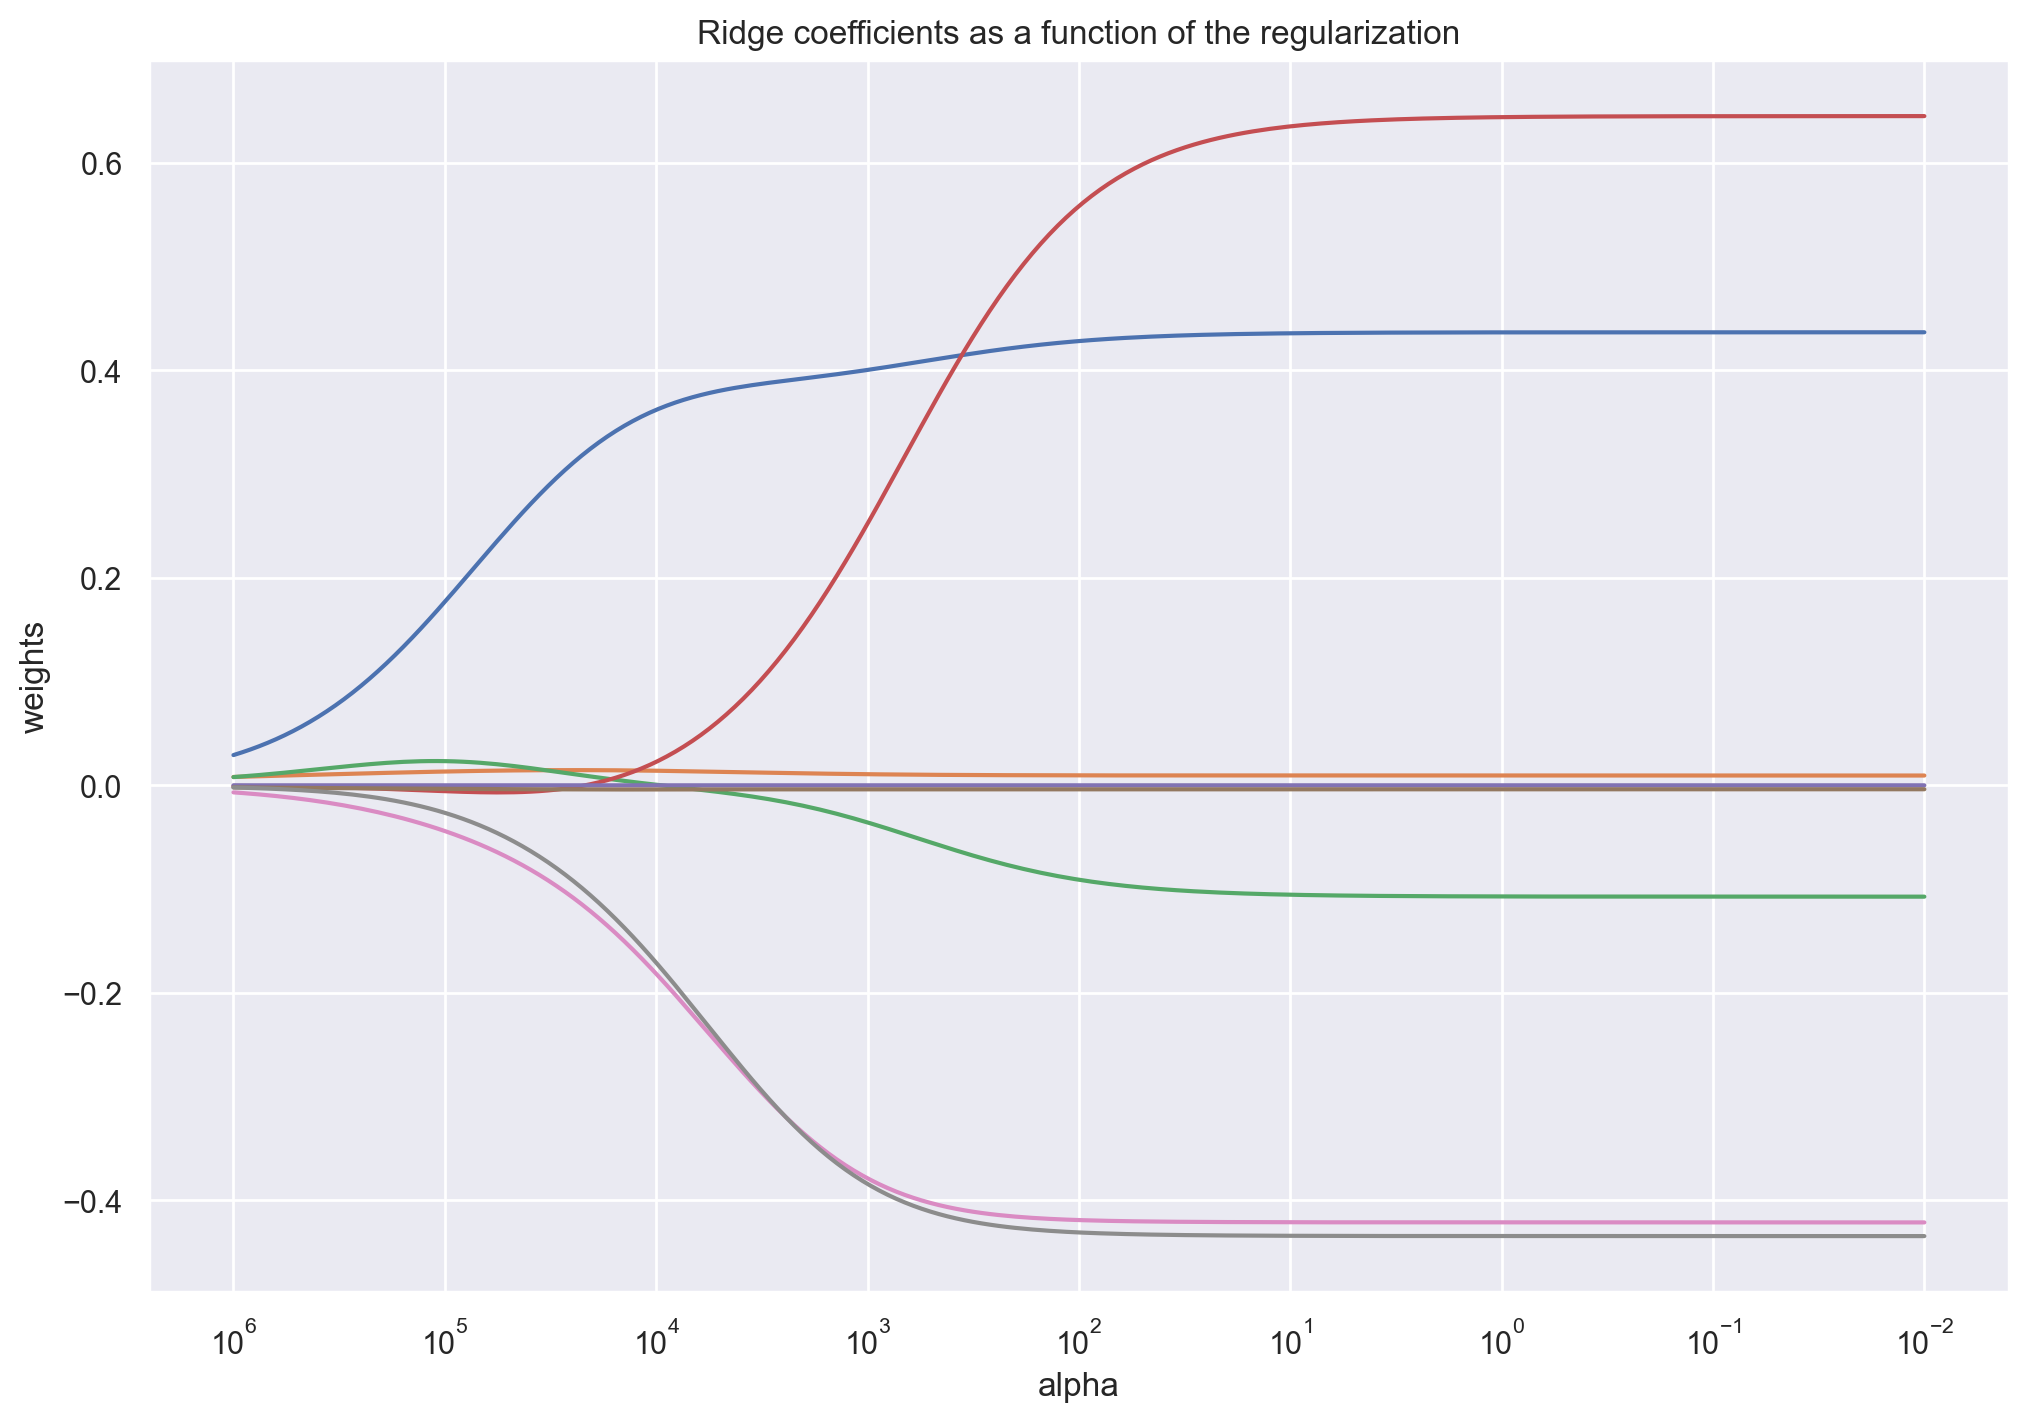

In [34]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
model = Ridge()

coefs = []
for a in ridge_alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

ax = plt.gca()
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(ridge_alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()